# Exercise 1

We first consider **scipy.stats**' *uniform* RNG to generate several sequences of length $n_i$. For this exercise seciton, we consider the uniform distribution $U(0,1)$.

In [6]:
## -------------------- Import necesary libraries --------------------
from scipy.stats import uniform, chisquare
import numpy as np
import matplotlib.pyplot as plt

In [7]:
## -------------------- Define parameters --------------------
# Sample sizes
sample_sizes = [45, 100, 10**3, 10**5] 

# Uniform distribution parameters U(0,1)
loc = 0
scale = 1

## **Part** *(1.a)*:

In this following snippet, we plot the theoretical Cummulative Distribution Function (CDF) $F(x) = 0 \text{ for } x < a, F(x) = (x - a) / (b - a) \text{ for a } ≤ x ≤ b \text{, and } F(x) = 1 \text{ for } x > b$ and compare it to the empirical CDF $\hat{F}(x)$.

In [8]:
## -------------- Define Theoretical CDF -------------------
X = np.linspace(loc, loc + scale, 10000)
cdf_theorical = uniform.cdf(X, loc=loc, scale=scale)

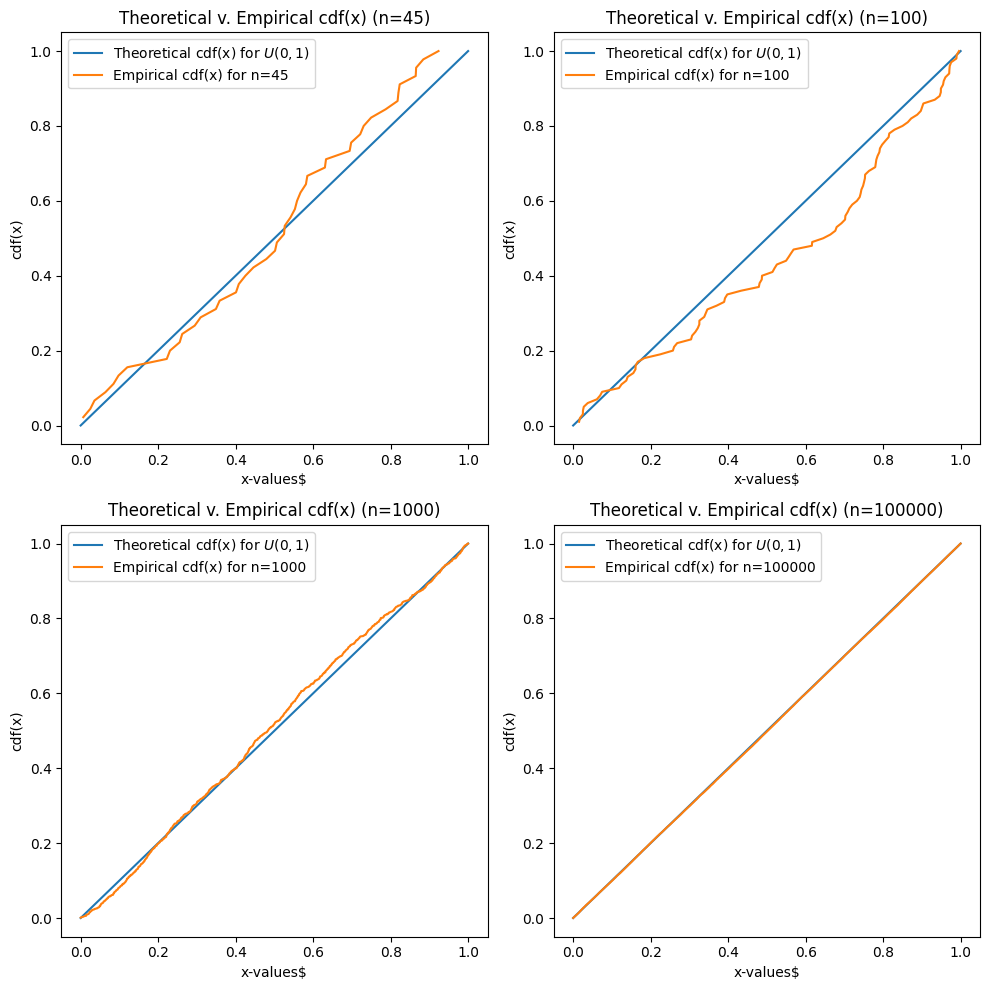

In [9]:
## -------------- Define Empirical CDF & Plot -----------------
fig, ax = plt.subplots(2, 2, figsize=(10,10)) # 2x2 Figure (since we have 4 sequences)
ax = ax.flatten()

for i, n in enumerate(sample_sizes):
    # Generate n random numbers from U(0,1)
    random_numbers = uniform.rvs(loc=loc, scale=scale, size=n)

    # Define empirical CDF
    x_Ecdf = np.sort(random_numbers) # Sort "randomized" values
    y_Ecdf = np.arange(1,n+1)/n # Create equispaced range for y-axis (1/n, ..., n/n+1)

    # Plot
    ax[i].plot(X, cdf_theorical, label="Theoretical cdf(x) for $U(0,1)$")
    ax[i].plot(x_Ecdf, y_Ecdf, label=f"Empirical cdf(x) for n={n}")

    # Plot configuration: Subplots
    ax[i].set_title(f"Theoretical v. Empirical cdf(x) (n={n})")
    ax[i].set_xlabel("x-values$")
    ax[i].set_ylabel("cdf(x)")
    ax[i].legend()

plt.tight_layout()
plt.show()

## **Part** *(1.b)*:

We now implement that which is our most basic goodness-of-fit test, the Q-Q plot.

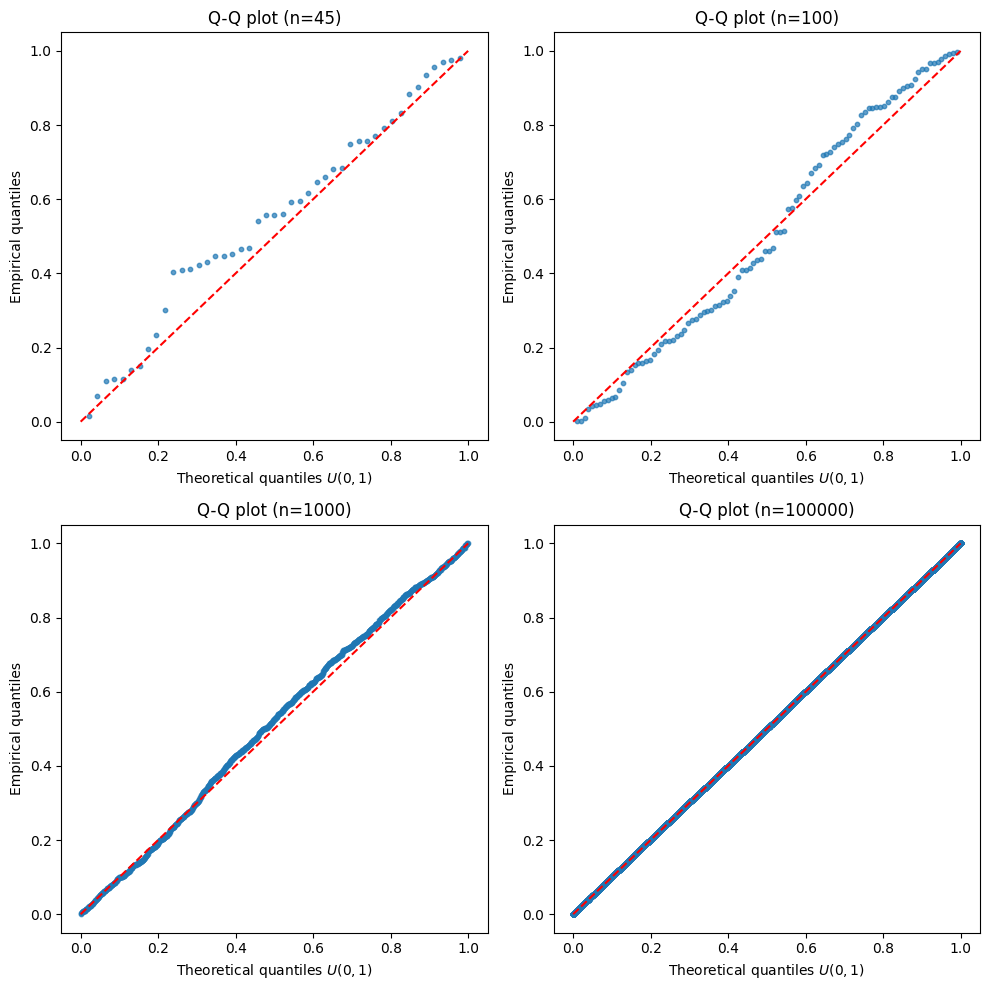

In [10]:
## ------------ Define and Create Plot --------------
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax = ax.flatten()

for i, n in enumerate(sample_sizes):
    # Generate "random" data (this serves as our empirical quantiles acording to the theory)
    random_numbers = uniform.rvs(loc=loc, scale=scale, size=n)
    E_quantiles = np.sort(random_numbers)

    # Calcualte theoretical quantiles
    probabilities = (np.arange(n) + 1) / (n + 1) # Create n probabilistic points equispaced on (0,1)
    T_quantiles = uniform.ppf(probabilities, loc=loc, scale=scale) # Use cdf^{-1}(x) (the inverse of CDF) in order to find the theoretical value for each probability

    # Plot
    ax[i].scatter(T_quantiles, E_quantiles, s=10, alpha=0.7)

    # Draw a reference line (in this case y=x)
    line_range = np.array([0,1])
    ax[i].plot(line_range, line_range, 'r--', label='Reference line ($y=x$)')

    # Plot configuration: Subplots
    ax[i].set_title(f"Q-Q plot (n={n})")
    ax[i].set_xlabel("Theoretical quantiles $U(0,1)$")
    ax[i].set_ylabel("Empirical quantiles")

# Adjust equispaced subplots
plt.tight_layout()
plt.show()
    

## **Part** *(2)*:

We now implement the Kolmogorov–Smirnov test to ascertain whether the empirical CDF of $U_1, \ldots, U_n$ matches the theoretical CDF of the $U(0,1)$ distribution at level $\alpha = 0.1$, i.e., we reject the null hypothesis $H_0$ at level $\alpha > 0$ that the sample $U_1, \ldots, U_n \sim U(0,1)$ if $\sqrt(n)D_n > K_{\alpha, n}$, where $D_n = \text{sup}_{x \in \mathbb{R}}\mid \hat{F}(x) - F(x) \mid$, and $K_{\alpha, n}$ is such that $\mathbb{P}(\sqrt(n)D_n > K_{\alpha, n}) < \alpha$.

In [11]:
## ---------- General parameters for K-S Test ---------------
ks_critical_values = {
    20 : 1.03, # alpha = 0.1 : 1.57; = 0.2 : 1.03; = 0.05 : 1.03 
    30 : 1.04, # alpha = 0.1 : 1.59; = 0.2 : 1.04; = 0.05 : 1.31
    35 : 1.06, # alpha = 0.1 : 1.60; = 0.2 : 1.06; = 0.05 : 1.36
    40 : 1.08, # alpha = 0.1 : 1.58; = 0.2 : 1.08; = 0.05 : 1.33
    45 : 1.07, # alpha = 0.1 : 1.61; = 0.2 : 1.07; = 0.05 : 1.34
    'large_n' : 1.63 # for n > 45
}

alpha = 0.2

In [12]:
## ------------- Manual KS test & Plot ---------------------
for n in sample_sizes:
    random_numbers = uniform.rvs(loc=loc, scale=scale, size=n)
    random_numbers_sorted = np.sort(random_numbers)

    F_theoretical = random_numbers_sorted # Theoretical CDF in each one of our data points; For U(0,1), F(x) = x
    i = np.arange(1, n+1) # Represents the 'steps' of the empirical CDF

    D_plus = np.max((i/n) - F_theoretical)
    D_minus = np.max(F_theoretical - ((i - 1) / n))
    D_n = max(D_plus, D_minus)
    scaled_Dn = np.sqrt(n) * D_n

    if n <= 45:
        closest_n = min(ks_critical_values.keys(), key=lambda k:float('inf') if isinstance(k, str) else abs(k-n))
        K_alpha_n = ks_critical_values[closest_n]
    else:
        K_alpha_n = ks_critical_values['large_n']

    # Realize hypothesis test
    print(f"\nSample size n = {n}")
    print(f"Test statistic ($sqrt(n)*D_n$): {scaled_Dn:.4f}")
    print(f"Critical value ($K_{alpha,n}$): {K_alpha_n:.4f}")

    if scaled_Dn > K_alpha_n:
        print("  Result: $H_0$ is rejected i.e. the sample does not follow a distribution U(0,1).")
    else:
        print("  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).")


Sample size n = 45
Test statistic ($sqrt(n)*D_n$): 0.4886
Critical value ($K_(0.2, 45)$): 1.0700
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 100
Test statistic ($sqrt(n)*D_n$): 1.2985
Critical value ($K_(0.2, 100)$): 1.6300
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 1000
Test statistic ($sqrt(n)*D_n$): 0.8248
Critical value ($K_(0.2, 1000)$): 1.6300
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 100000
Test statistic ($sqrt(n)*D_n$): 0.7822
Critical value ($K_(0.2, 100000)$): 1.6300
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).


## **Part** *(3)*:

Finally, we would like to test for independence. We'll use the $\Chi^2$ test in this case.

In [13]:
## -------------------- Chi^2 Test -------------------
k = 20 # number of bins

for n in sample_sizes:
    random_numbers = uniform.rvs(loc=loc, scale=scale, size=n)

    observed_frequencies, _ = np.histogram(random_numbers, bins=k, range=(0,1))
    expected_frequency = n / k

    chi2_statistic = np.sum((observed_frequencies - expected_frequency) ** 2 / expected_frequency)

    deg_freedom = k - 1
    critical_value = chi2.ppf(1 - alpha, df=deg_freedom)

    # Realize hypothesis test
    print(f"\nSample size n = {n}")
    print(f"Test statistic : {chi2_statistic:.4f}")
    print(f"Critical value: {critical_value:.4f} (with {deg_freedom} degrees of freedom)")

    if chi2_statistic > critical_value:
        print("  Result: $H_0$ is rejected i.e. the sample does not follow a distribution U(0,1).")
    else:
        print("  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).")


Sample size n = 45
Test statistic : 22.1111
Critical value: 23.9004 (with 19 degrees of freedom)
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 100
Test statistic : 20.0000
Critical value: 23.9004 (with 19 degrees of freedom)
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 1000
Test statistic : 10.6800
Critical value: 23.9004 (with 19 degrees of freedom)
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 100000
Test statistic : 22.0668
Critical value: 23.9004 (with 19 degrees of freedom)
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).


# Exercise 2

We would now proceed to implement the linear congruential generator (LCG)
$$X_k = (aX_{k−1} + b) \text{ mod } m \text{ , } U_k ∶= \frac{X_k}{m}$$
with $a = 3$, $b = 0$, and $m = 31$.

## **Part** *(1)*

In [14]:
## --------------- Defining LCG --------------
def lcg(n, seed=7):
    """
    Implementation of Linear Congruential Generator (LCG)

    Args:
    n (int): Number of samples to generate
    seed (int): Initial permutation state

    Returns:
    np.array: Sequence of lenght n "randomly" generated by LCG
    """

    # Define general parameters for LCG
    a = 3
    b = 0
    m = 31

    u = np.zeros(n)

    # Establish the seed
    x = seed

    # Recursion
    for i in range(n):
        x = (a * x + b) % m
        u[i] = x / m

    return u

Now, we repeat Exercise 1 but instead of producing our pseudo-random samples from a uniform model we use our own. Since we've already defined the theoretical cdf above we may skip this step.

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2664/1447923873.py:14: SyntaxWarning: invalid escape sequence '\m'
  ax[i].plot(X, cdf_theorical, label='Theoretical cdf(x) for $\mathcal{U}(0,1)$')


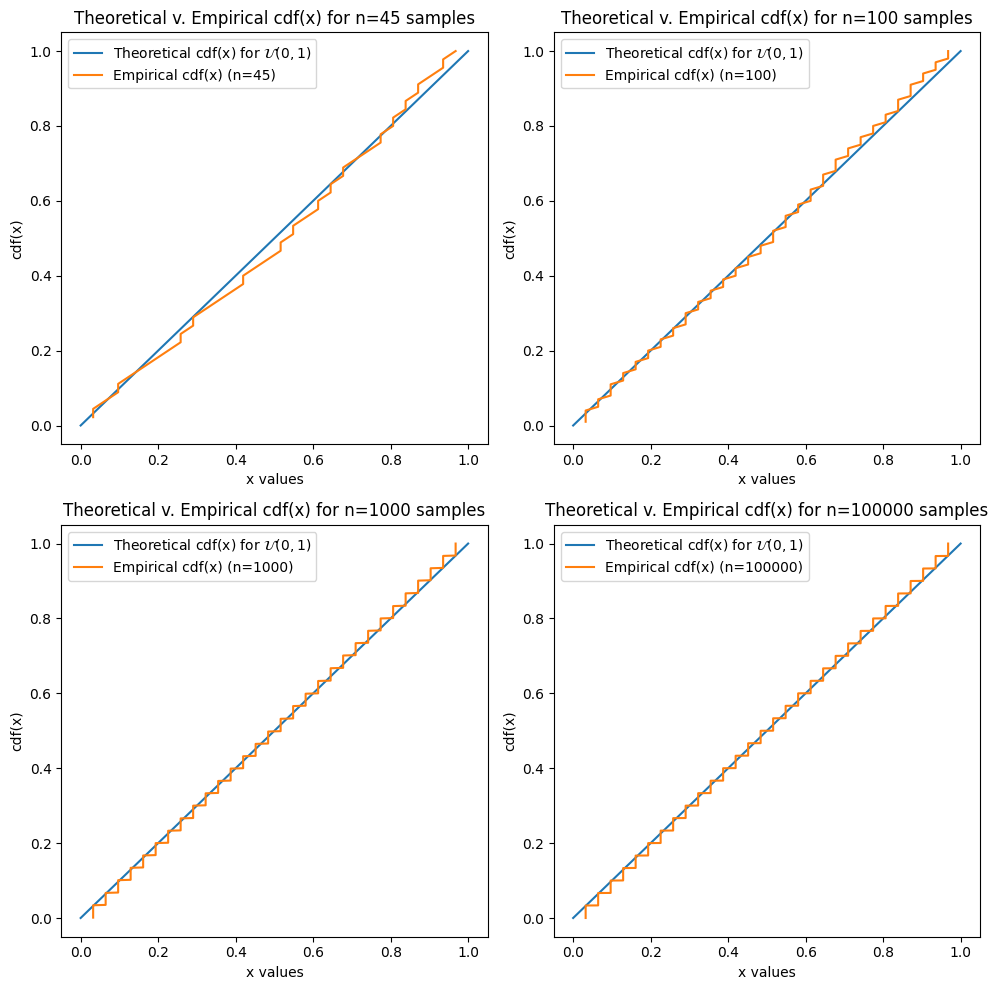

In [15]:
## ------------------ Define Empirical CDF and Plot -----------------------
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax = ax.flatten()

for i, n in enumerate(sample_sizes):
    # Generate out random numbers for each sample size from our LCG
    random_numbers = lcg(n)

    # Define empirical cdf
    x_Ecdf = sorted(random_numbers) # sort our samples
    y_Ecdf = np.arange(1, 1+n) / n

    # Plot
    ax[i].plot(X, cdf_theorical, label='Theoretical cdf(x) for $\mathcal{U}(0,1)$')
    ax[i].plot(x_Ecdf, y_Ecdf, label=f'Empirical cdf(x) (n={n})')

    # Plot specs
    ax[i].set_xlabel('x values')
    ax[i].set_ylabel('cdf(x)')
    ax[i].set_title(f'Theoretical v. Empirical cdf(x) for n={n} samples')
    ax[i].legend()

plt.tight_layout()
plt.show()

Now, we do the Q-Q Plots (our first and easiest goodness-of-fit test!)

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_2664/618629460.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_title('Q-Q plot of $\mathcal{U}(0,1)$ vs. LCG')
/tmp/ipykernel_2664/618629460.py:22: SyntaxWarning: invalid escape sequence '\h'
  ax[i].set_ylabel('Empirical quantiles $\hat{q}_{i}$')
/tmp/ipykernel_2664/618629460.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


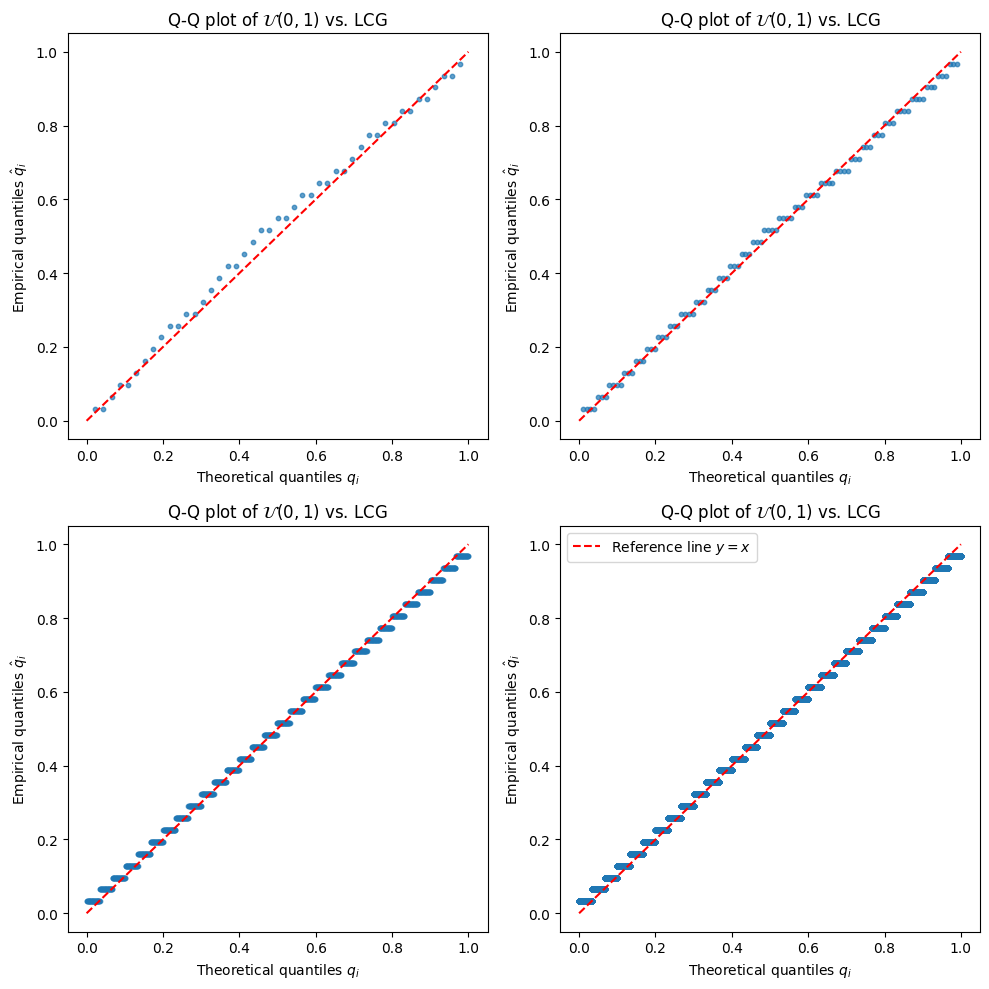

In [16]:
## --------------- Quantile-Quantile Plot ------------------------
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax = ax.flatten()

for i, n in enumerate(sample_sizes):
    # Generate random data from our lcg and obtain empirical quantiles
    random_numbers = lcg(n)
    E_quantiles = sorted(random_numbers) # According to theory, empirical quantiles are just our sorted samples i.e. \hat q_i = X_k^i
    
    # Calculate theoretical quantiles
    probabilities = (np.arange(n) + 1) / (n + 1)
    T_quantiles  = uniform.ppf(probabilities, loc=loc, scale=scale) # Apply the inverse of cdf(x) and attain the theoretical quantiles

    # Plot baby plot
    ax[i].scatter(T_quantiles, E_quantiles, s=10, alpha=0.7)
    
    line_domain_range = np.array([0,1]) # We want to draw a reference line in order to understand how quantiles deviate from theoretical
    ax[i].plot(line_domain_range,  line_domain_range, 'r--', label='Reference line $y=x$')

    ax[i].set_title('Q-Q plot of $\mathcal{U}(0,1)$ vs. LCG')
    ax[i].set_xlabel('Theoretical quantiles ${q}_i$')
    ax[i].set_ylabel('Empirical quantiles $\hat{q}_{i}$')

    plt.legend()

plt.tight_layout()
plt.show()
    

Finally, we perform our two main goodness-of-fit tests i.e. Kolmogorov-Smirnov and $\chi^2$ tests.

In [17]:
## ------------- Manual KS test & Plot ---------------------
for n in sample_sizes:
    random_numbers = lcg(n)
    random_numbers_sorted = np.sort(random_numbers)

    F_theoretical = random_numbers_sorted # Theoretical CDF in each one of our data points; For U(0,1), F(x) = x
    i = np.arange(1, n+1) # Represents the 'steps' of the empirical CDF

    D_plus = np.max((i/n) - F_theoretical)
    D_minus = np.max(F_theoretical - ((i - 1) / n))
    D_n = max(D_plus, D_minus)
    scaled_Dn = np.sqrt(n) * D_n

    if n <= 45:
        closest_n = min(ks_critical_values.keys(), key=lambda k:float('inf') if isinstance(k, str) else abs(k-n))
        K_alpha_n = ks_critical_values[closest_n]
    else:
        K_alpha_n = ks_critical_values['large_n']

    # Realize hypothesis test
    print(f"\nSample size n = {n}")
    print(f"Test statistic ($sqrt(n)*D_n$): {scaled_Dn:.4f}")
    print(f"Critical value ($K_{alpha,n}$): {K_alpha_n:.4f}")

    if scaled_Dn > K_alpha_n:
        print("  Result: $H_0$ is rejected i.e. the sample does not follow a distribution U(0,1).")
    else:
        print("  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).")


## -------------------- Chi^2 Test -------------------
k = 20 # number of bins

for n in sample_sizes:
    random_numbers = lcg(n)

    observed_frequencies, _ = np.histogram(random_numbers, bins=k, range=(0,1))
    expected_frequency = n / k

    chi2_statistic = np.sum((observed_frequencies - expected_frequency) ** 2 / expected_frequency)

    deg_freedom = k - 1
    critical_value = chi2.ppf(1 - alpha, df=deg_freedom)

    # Realize hypothesis test
    print(f"\nSample size n = {n}")
    print(f"Test statistic : {chi2_statistic:.4f}")
    print(f"Critical value: {critical_value:.4f} (with {deg_freedom} degrees of freedom)")

    if chi2_statistic > critical_value:
        print("  Result: $H_0$ is rejected i.e. the sample does not follow a distribution U(0,1).")
    else:
        print("  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).")


Sample size n = 45
Test statistic ($sqrt(n)*D_n$): 0.4809
Critical value ($K_(0.2, 45)$): 1.0700
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 100
Test statistic ($sqrt(n)*D_n$): 0.3903
Critical value ($K_(0.2, 100)$): 1.6300
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 1000
Test statistic ($sqrt(n)*D_n$): 1.0201
Critical value ($K_(0.2, 1000)$): 1.6300
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 100000
Test statistic ($sqrt(n)*D_n$): 10.2009
Critical value ($K_(0.2, 100000)$): 1.6300
  Result: $H_0$ is rejected i.e. the sample does not follow a distribution U(0,1).

Sample size n = 45
Test statistic : 9.6667
Critical value: 23.9004 (with 19 degrees of freedom)
  Result: $H_0$ can not be rejected i.e. the sample follows a distribution U(0,1).

Sample size n = 100
Test statistic : 13.2000
Critical value: 23.9004 (with 19 de

## **Part** *(2)*

We now wish to implement both serial and gap tests in order to scrutanize both of the pseudo-random number generators used throughout this exercise.

In [18]:
## ------------------ Serial Testo function -----------------
def serial_test(sample, partition_size=2):

    n = len(sample) - 1
    bins = np.linspace(0, 1, k+1)   # create bin edges
    counts = np.zeros((k, k), dtype=int)
    
    # Step 1: Assign each sample to a bin index
    indices = np.digitize(sample, bins) - 1
    
    # Step 2: Count how often (U_n, U_{n+1}) falls into each (i,j)
    for i in range(n):
        counts[indices[i], indices[i+1]] += 1
    
    # Step 3: Expected frequency = uniform distribution over k^2 cells
    expected = np.ones((k, k)) * n / (k*k)
    
    # Step 4: Apply chi-square test
    chi2, pval = chisquare(counts.ravel(), expected.ravel())
    return chi2, pval, counts, expected

In [21]:
## ------------------ Gap Testo function ------------------------------
def gap_test(sample, interval=(0.0, 0.5)):
    a, b = interval
    probability = b - a # Calculate the probability of landing inside [a,b) under true uniformity

    gaps = [] # Store the lengths of the gap
    count = 0 # Counter for current gap length
    in_gap = True # Flag in order to keep tabs to see if we're counting

    # Step 1: Iterate through sample
    for x in sample:
        if a <= x < b: # Said sample is inside our interval
            gaps.append(count) # Save gap lenght
            count = 0 # Reset count
            in_gap = True

        else:
            if in_gap:
                count += 1

    # Step 2: Build observed frequency distriburion of gap length
    max_gap = min(10, max(gaps)) # Truncate gap lenght in order to preserve stability
    obs_counts = np.zeros(max_gap+1)
    for g in gaps:
        obs_counts[min(g, max_gap)] += 1
    
    # Step 3: Compute expected frequencies
    # The theoretical gap length follows a geometric distribution:
    #   P(G=k) = (1-p)^k * p
    exp_counts = np.array([len(gaps) * (probability * ((1-probability)**k)) for k in range(max_gap)])
    exp_counts = np.append(exp_counts, len(gaps) * ((1-probability)**max_gap))
    
    # Step 4: Apply chi-square test
    chi2, pval = chisquare(obs_counts, exp_counts)
    return chi2, pval, obs_counts, exp_counts 


In [22]:
## ----------------------------- Testo Testo --------------------------------------------
for i in sample_sizes:
    random_numbers_scipy = uniform.rvs(loc=loc, scale=scale, size=i)
    random_numbers_fiki = lcg(i)

    print('Gap test for samples generated with scipy uniform.rvs  pseudo-rng: ', gap_test(random_numbers_scipy))
    print('Gap test for samples generated with my LCG  pseudo-rng: ', gap_test(random_numbers_fiki))

Gap test for samples generated with scipy uniform.rvs  pseudo-rng:  (np.float64(1.6956521739130435), np.float64(0.7915072602299148), array([10.,  8.,  2.,  2.,  1.]), array([11.5   ,  5.75  ,  2.875 ,  1.4375,  1.4375]))
Gap test for samples generated with my LCG  pseudo-rng:  (np.float64(51.1), np.float64(2.510203439479305e-08), array([13.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  2.]), array([10.      ,  5.      ,  2.5     ,  1.25    ,  0.625   ,  0.3125  ,
        0.15625 ,  0.078125,  0.078125]))
Gap test for samples generated with scipy uniform.rvs  pseudo-rng:  (np.float64(4.3584905660377355), np.float64(0.7376835082091772), array([32., 10.,  4.,  3.,  2.,  1.,  0.,  1.]), array([26.5      , 13.25     ,  6.625    ,  3.3125   ,  1.65625  ,
        0.828125 ,  0.4140625,  0.4140625]))
Gap test for samples generated with my LCG  pseudo-rng:  (np.float64(51.25), np.float64(2.3485584029324753e-08), array([32.,  7.,  3.,  3.,  0.,  0.,  0.,  0.,  3.]), array([24.    , 12.    ,  6.    ,  3. 